Checking for data reliability using Benford's law.

https://en.wikipedia.org/wiki/Benford%27s_law

In [1]:
!wget -N https://www.ecdc.europa.eu/sites/default/files/documents/COVID-19-geographic-disbtribution-worldwide.xlsx

--2020-09-17 13:36:41--  https://www.ecdc.europa.eu/sites/default/files/documents/COVID-19-geographic-disbtribution-worldwide.xlsx
Resolving www.ecdc.europa.eu (www.ecdc.europa.eu)... 13.227.219.10, 13.227.219.122, 13.227.219.21, ...
Connecting to www.ecdc.europa.eu (www.ecdc.europa.eu)|13.227.219.10|:443... connected.
HTTP request sent, awaiting response... 304 Not Modified
File ‘COVID-19-geographic-disbtribution-worldwide.xlsx’ not modified on server. Omitting download.



In [2]:
import pandas as pd
import numpy  as np

%matplotlib inline

In [3]:
df = pd.read_excel('COVID-19-geographic-disbtribution-worldwide.xlsx', keep_default_na=False, na_values='')
df.head(10)

dateRep  day  month  year  cases  deaths countriesAndTerritories geoId  \
0 2020-09-17   17      9  2020     17       0             Afghanistan    AF   
1 2020-09-16   16      9  2020     40      10             Afghanistan    AF   
2 2020-09-15   15      9  2020     99       6             Afghanistan    AF   
3 2020-09-14   14      9  2020     75       0             Afghanistan    AF   
4 2020-09-13   13      9  2020     35       0             Afghanistan    AF   
5 2020-09-12   12      9  2020     34       0             Afghanistan    AF   
6 2020-09-11   11      9  2020     28       0             Afghanistan    AF   
7 2020-09-10   10      9  2020     24       2             Afghanistan    AF   
8 2020-09-09    9      9  2020     26       3             Afghanistan    AF   
9 2020-09-08    8      9  2020     96       3             Afghanistan    AF   

  countryterritoryCode  popData2019 continentExp  \
0                  AFG   38041757.0         Asia   
1                  AFG   38041757.0         Asia   
2                  AFG   38041757.0         Asia   
3                  AFG   38041757.0         Asia   
4                  AFG   38041757.0         Asia   
5                  AFG   38041757.0         Asia   
6                  AFG   38041757.0         Asia   
7                  AFG   38041757.0         Asia   
8                  AFG   38041757.0         Asia   
9                  AFG   38041757.0         Asia   

   Cumulative_number_for_14_days_of_COVID-19_cases_per_100000  
0                                           1.653446           
1                                           1.708649           
2                                           1.627159           
3                                           1.456294           
4                                           1.309088           
5                                           1.224970           
6                                           1.164510           
7                                           1.098793           
8                                           1.180282           
9                                           1.114565

Checking Benford's law for all figures. For a continent check, change the first line to something like `df['continentExp'] == 'Europe'`. We use a `lambda` function to select the first character, count the occurrences, and calculate the relative number. Then we create a column according to Benford's law as a reference and plot both.

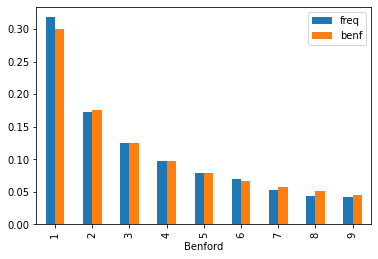

In [4]:
df['Benford'] = df[(df['cases'] > 0) & (df['continentExp'] != '')]['cases'].apply(lambda x: str(x)[0])
df['count'] = 1
df_benf = df[['Benford', 'count']].groupby(by='Benford').sum()
df_benf['freq'] = df_benf['count'] / df_benf['count'].sum()
df_benf['benf'] = np.log10(1 + 1 / df_benf.index.values.astype(float))
df_benf[['freq', 'benf']].plot(kind='bar')

Kolmogorov-Smirnov is an easy way to compare two distributions by calculating the maximum difference between the cumulative values, where `0` is exact correspondence.

In [5]:
KS = abs(df_benf['freq'].cumsum() - df_benf['benf'].cumsum()).max()
print('KS {:1.3f}'.format(KS))

KS 0.017
